In [1]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
import nibabel as nib
import random
from scipy import stats
from scipy import fft
import random
import pywt.data
from PIL import Image
import pandas as pd
import seaborn as sns
import os
import pickle

In [2]:
# assign directory
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'

ROOT_DIR = BRANDON
data_dir = ROOT_DIR + 'raw-data/100_syntheticMRI-3d'
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir)]
file_names = os.listdir(data_dir)
n = len(file_list)
n

100

In [37]:
os.chdir(ROOT_DIR + "testing-framework/")
from utilities import *
from plot_utilities import *
os.chdir(ROOT_DIR + "dataset-preparation/")
from transform_utilities import *
from scipy import ndimage


''

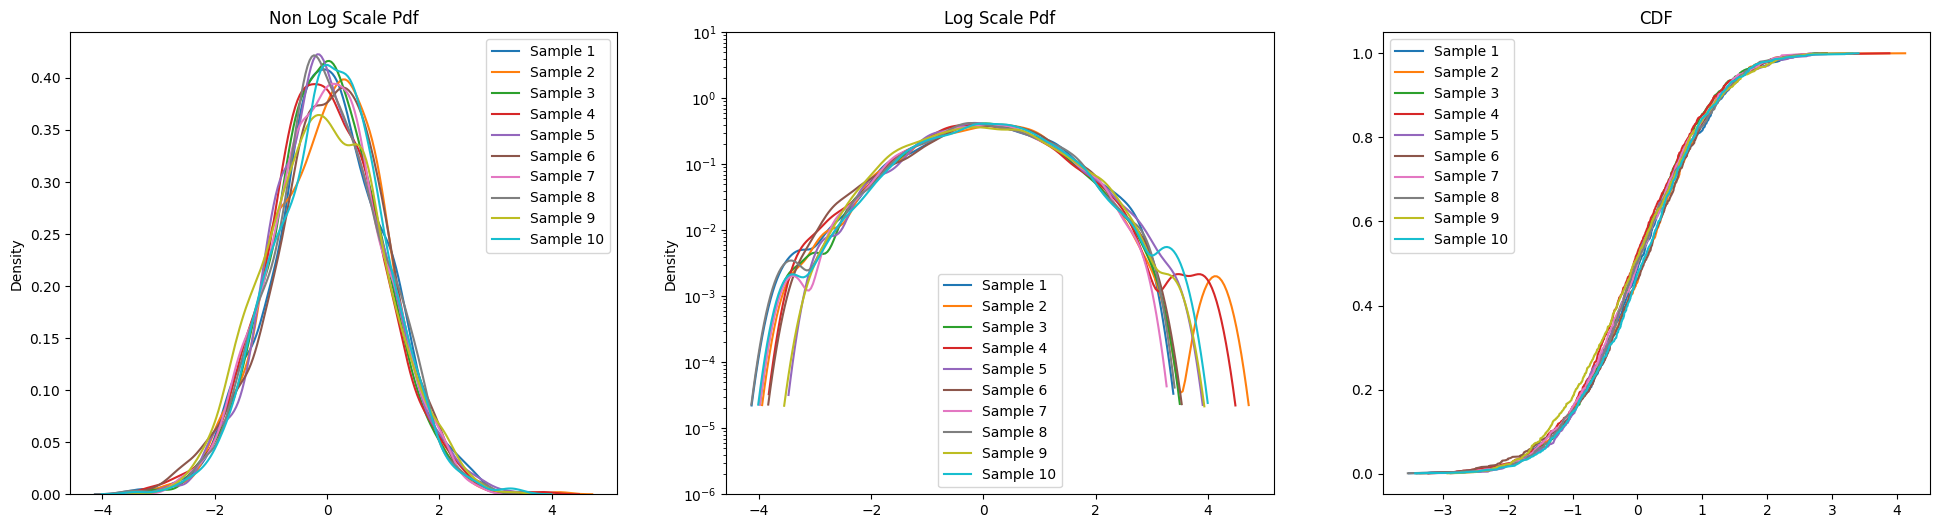

In [38]:
multiSampleComparisonPlots([stats.norm.rvs(size = 1000) for i in range(10)], [f"Sample {i+1}" for i in range(10)])
""

In [19]:
def ksCombinations(samps, samp_names):
    df = pd.DataFrame(columns = ["First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            



In [4]:
def filter_func(x):
    x_copy = x.copy().astype(float)
    filtered = ndimage.uniform_filter(x, size = 3)
    #filtered = ndimage.median_filter(x.astype("float"), size = 7)
    x_copy[np.isclose(filtered, 0)] = np.nan
    #x_copy[filtered <= 0.05] = np.nan
    return x_copy
wv = convert_to_wavelet_basis_3d(data_dir, image_func= filter_func, debug = True)
wv["data"] = wv["data"].apply(lambda x: x[~np.isnan(x)])
wv.head(10)

8 layers being used


100%|██████████| 100/100 [00:55<00:00,  1.82it/s]


,layer,orientation,data
0,1,L1,[]
1,2,aad,[]
2,2,ada,[]
3,2,add,[]
4,2,daa,[]
5,2,dad,[]
6,2,dda,[]
7,2,ddd,[]
8,3,aad,"[-1178617.707031251, -180064.888671875, -10603..."
9,3,ada,"[-163132.13281250038, -128205.81445312491, -28..."


# Layer 3

159


,First,Second,KS_Stat,Pvalue
15,daa,dad,0.062893,9.129474e-01
20,dda,ddd,0.094340,4.801035e-01
13,add,dda,0.176101,1.429622e-02
14,add,ddd,0.176101,1.429622e-02
8,ada,dad,0.283019,5.148708e-06
18,dad,dda,0.295597,1.570582e-06
16,daa,dda,0.314465,2.386790e-07
7,ada,daa,0.327044,6.341073e-08
19,dad,ddd,0.333333,3.200447e-08
17,daa,ddd,0.352201,3.780135e-09


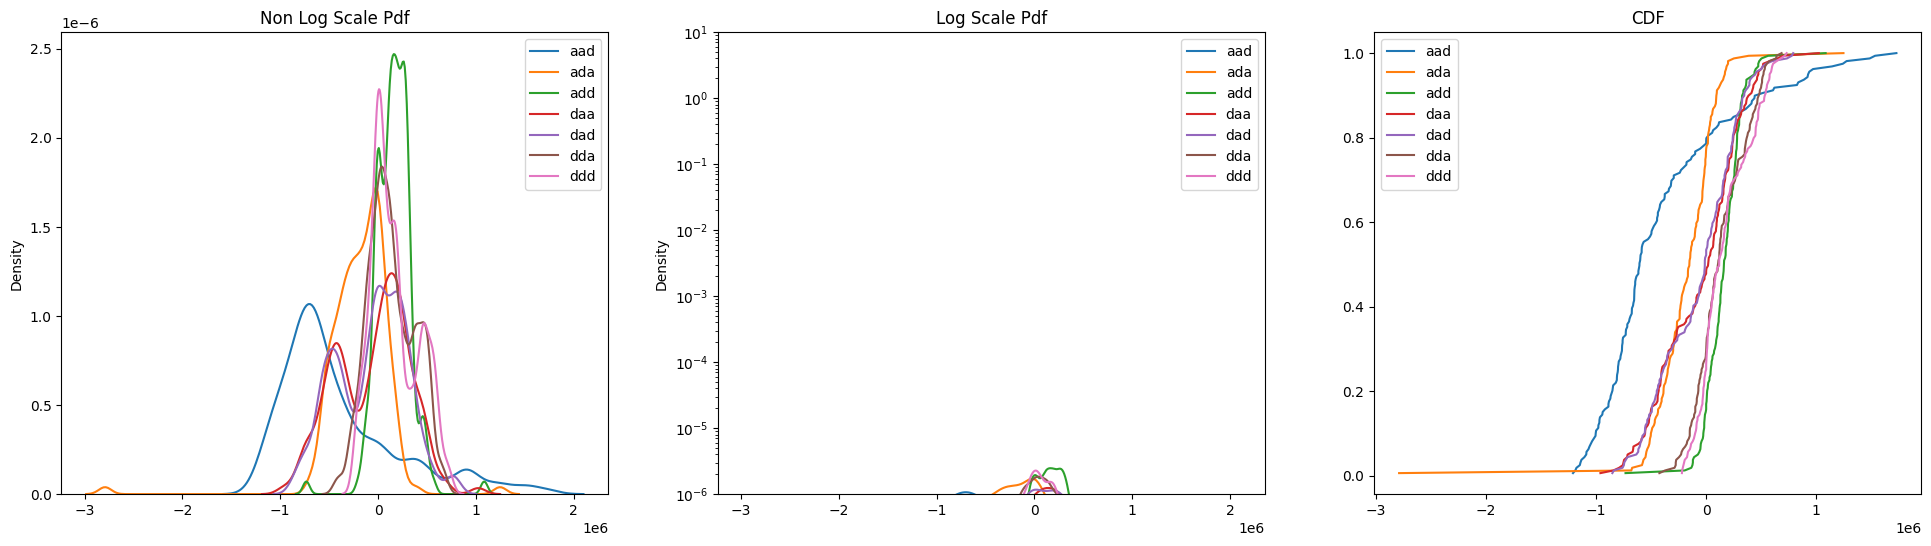

In [22]:
layer = 3
layer_df = wv[wv["layer"] == layer]
data = layer_df["data"].to_list()
names = layer_df["orientation"].to_list()
print(len(data[0]))
multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)
ks_df = ksCombinations(data, layer_df["orientation"].to_list()).sort_values(["KS_Stat"])
ks_df

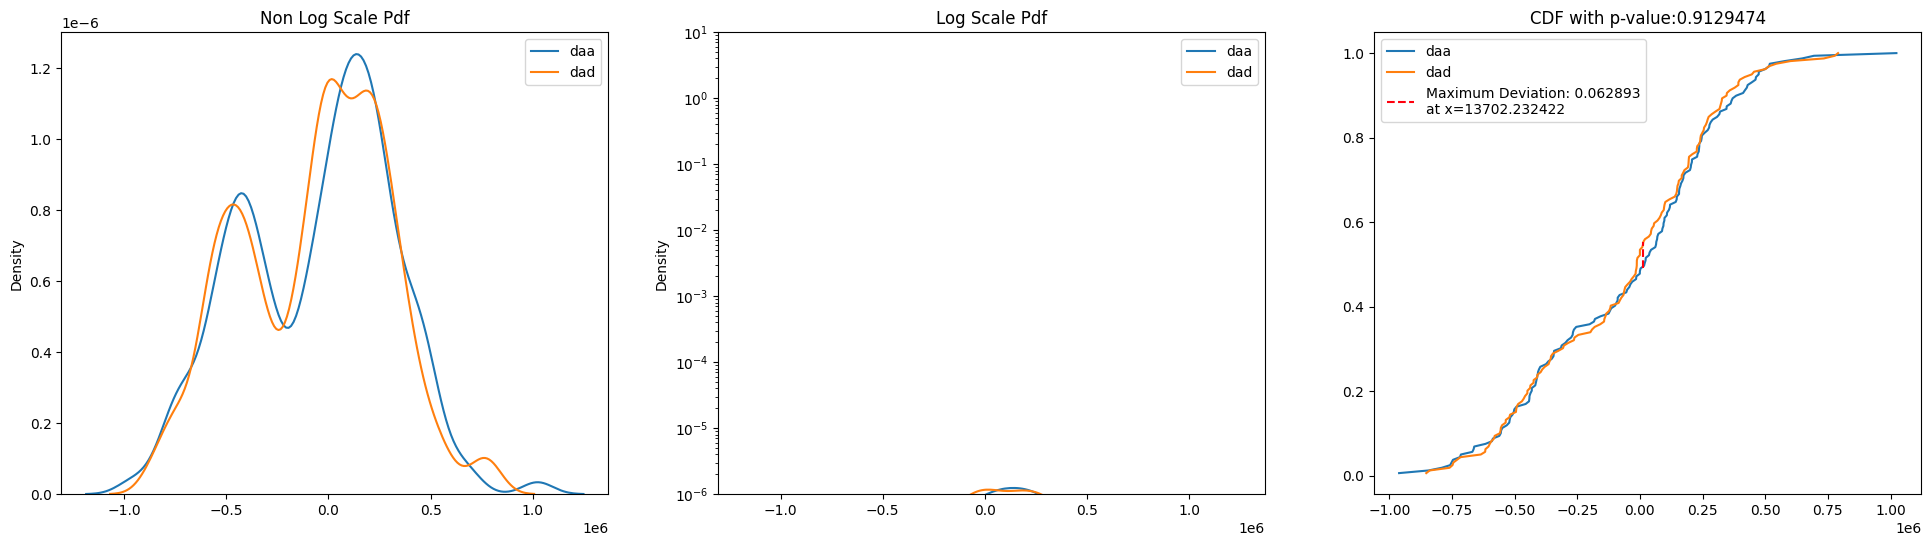

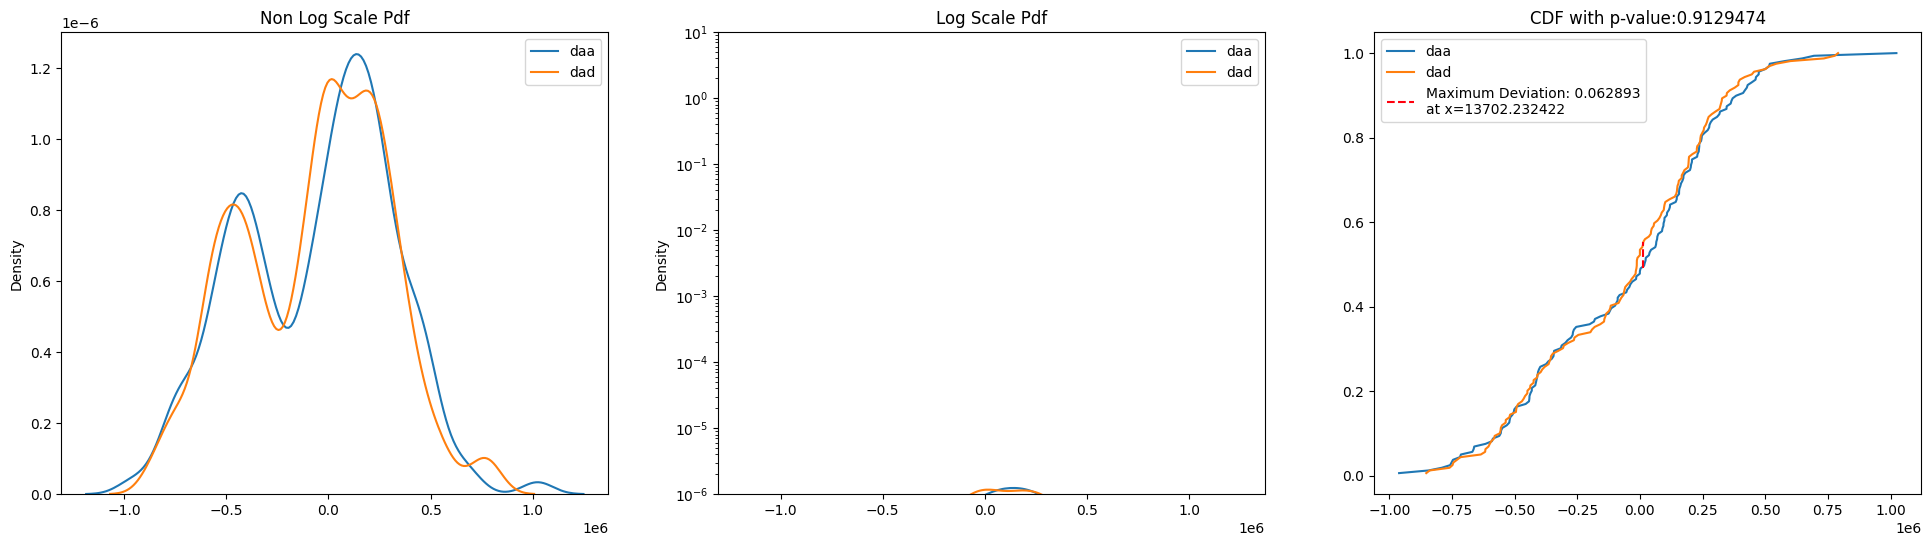

In [25]:
first_samp = layer_df[layer_df["orientation"] == "daa"]["data"].iloc[0]
second_samp = layer_df[layer_df["orientation"] == "dad"]["data"].iloc[0]
twoSampleComparisonPlots(first_samp, second_samp, samp1name="daa", samp2name= "dad")
""

# Layer 4

4396


,First,Second,KS_Stat,Pvalue
20,dda,ddd,0.037762,3.787475e-03
6,ada,add,0.039126,2.387379e-03
15,daa,dad,0.040036,1.739182e-03
7,ada,daa,0.065514,1.264145e-08
12,add,dad,0.068016,2.904103e-09
11,add,daa,0.076661,1.178855e-11
8,ada,dad,0.099636,2.083763e-19
13,add,dda,0.108963,3.902712e-23
19,dad,ddd,0.118289,3.371206e-27
18,dad,dda,0.122384,4.339329e-29


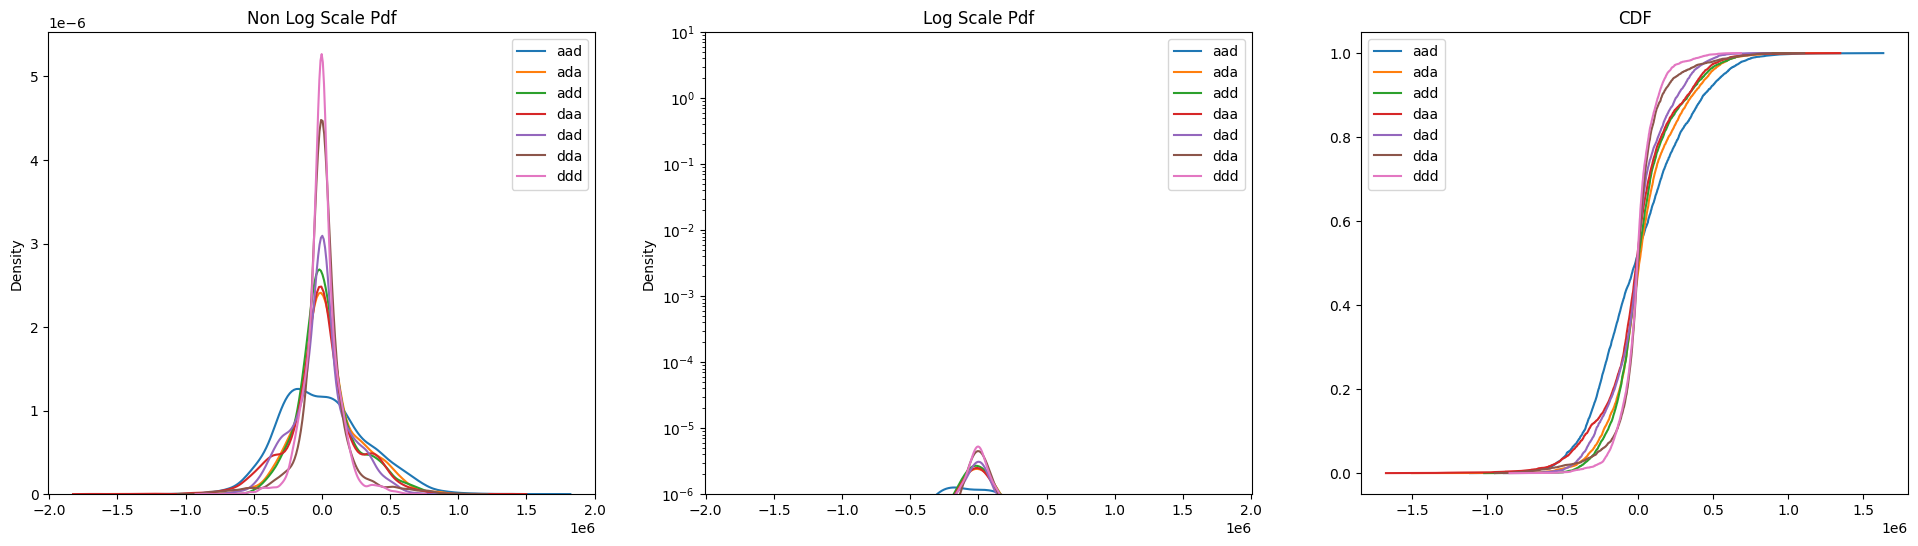

In [26]:
layer = 4
layer_df = wv[wv["layer"] == layer]
data = layer_df["data"].to_list()
names = layer_df["orientation"].to_list()
print(len(data[0]))
multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)
ks_df = ksCombinations(data, layer_df["orientation"].to_list()).sort_values(["KS_Stat"])
ks_df

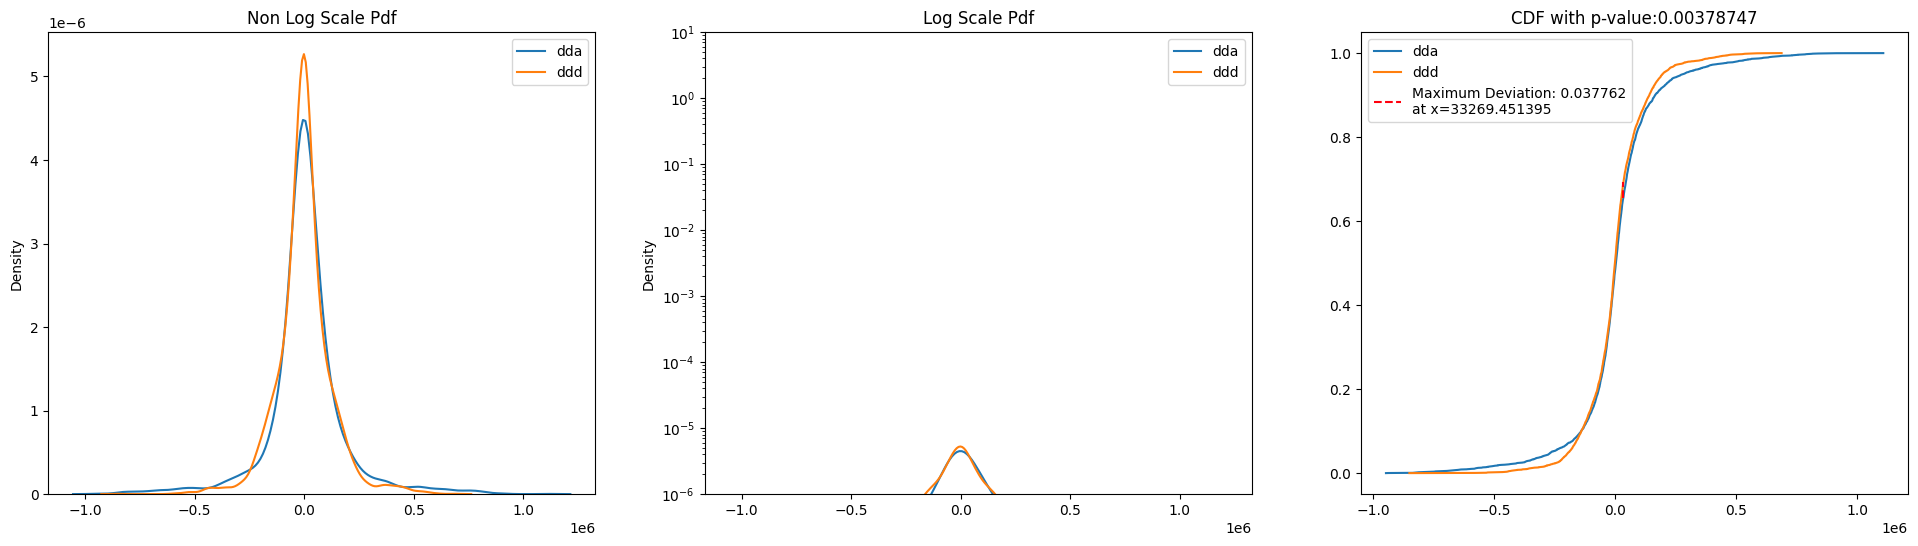

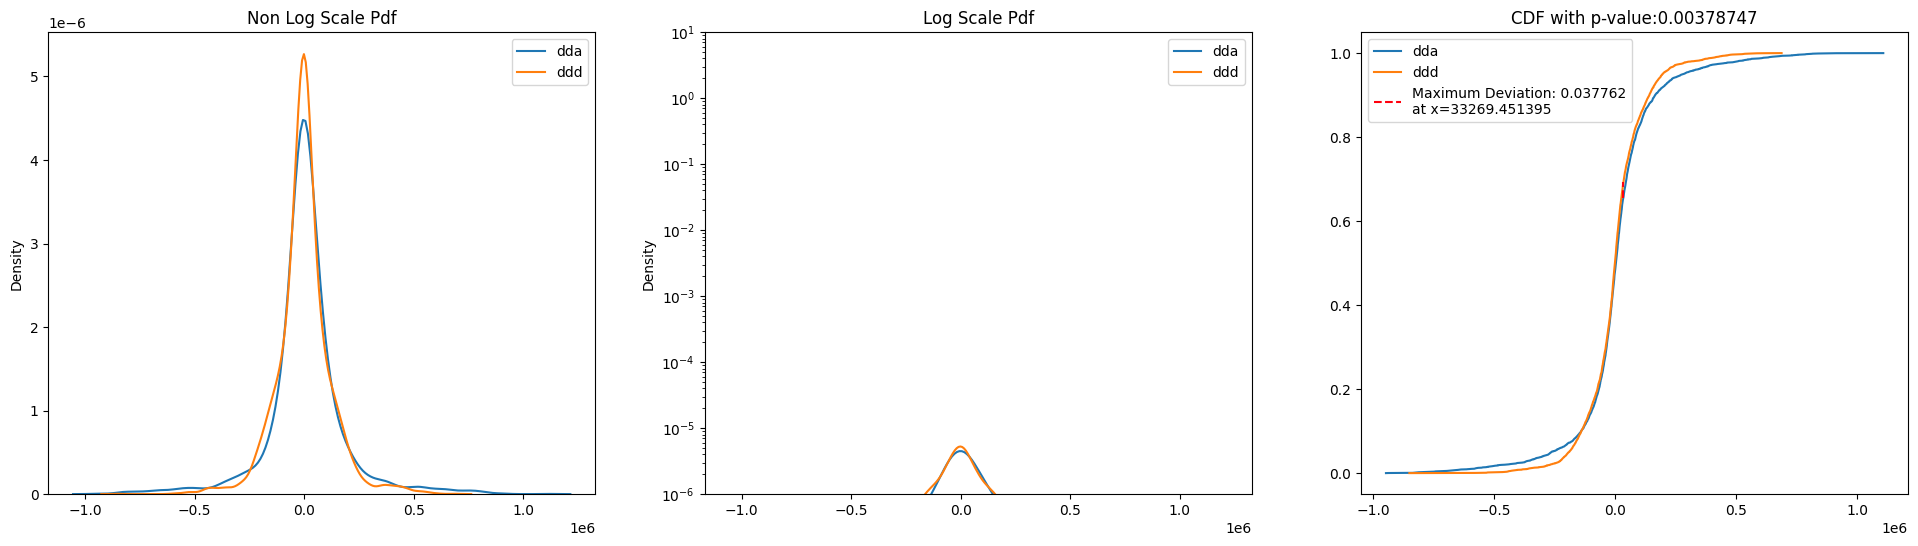

In [28]:
first_samp = layer_df[layer_df["orientation"] == "dda"]["data"].iloc[0]
second_samp = layer_df[layer_df["orientation"] == "ddd"]["data"].iloc[0]
twoSampleComparisonPlots(first_samp, second_samp, samp1name="dda", samp2name= "ddd")
""

# Layer 5

54041


,First,Second,KS_Stat,Pvalue
13,add,dda,0.015821,2.639235e-06
12,add,dad,0.020614,2.095363e-10
18,dad,dda,0.027128,1.045580e-17
2,aad,daa,0.042505,7.432661e-43
0,aad,ada,0.053663,4.549258e-68
20,dda,ddd,0.067301,7.475003e-107
14,add,ddd,0.069281,3.259295e-113
7,ada,daa,0.082326,9.373067e-160
19,dad,ddd,0.086120,8.448479e-175
8,ada,dad,0.087563,1.054800e-180


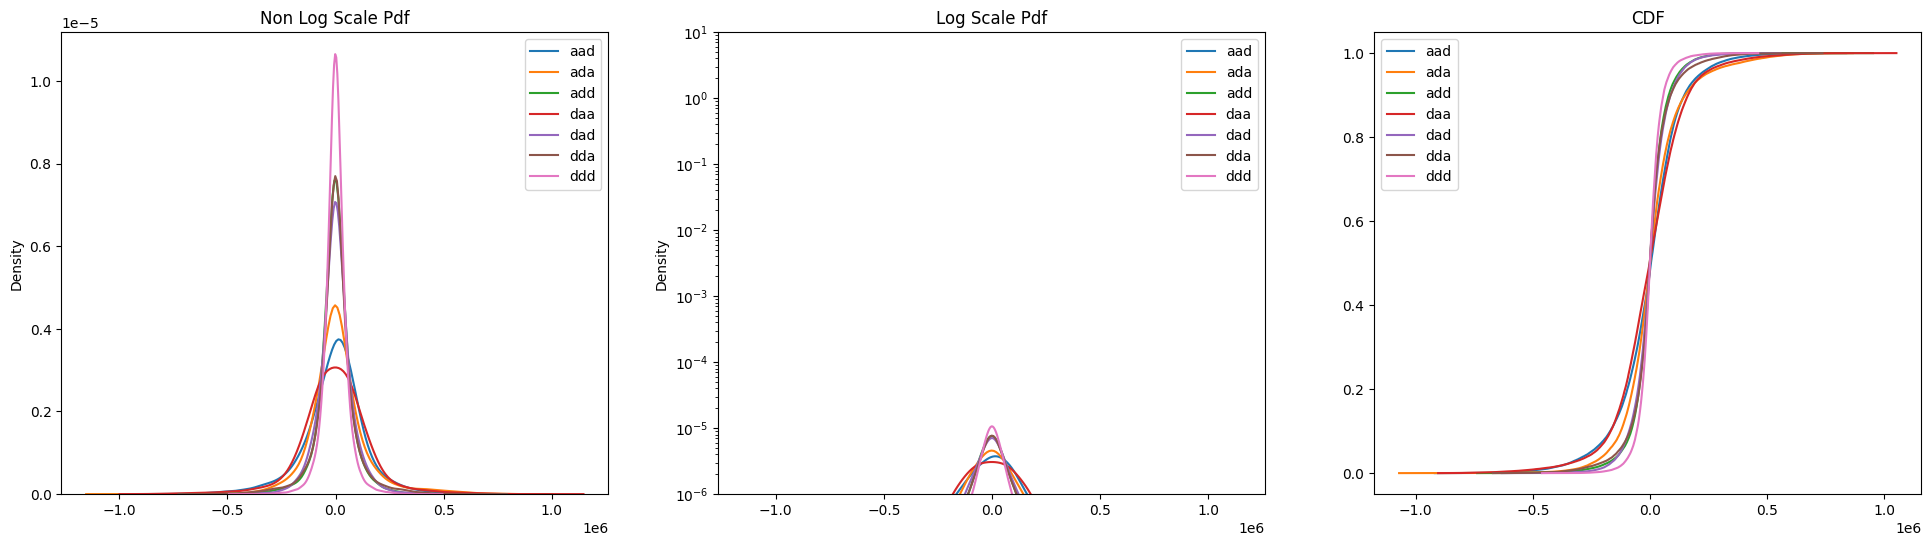

In [29]:
layer = 5
layer_df = wv[wv["layer"] == layer]
data = layer_df["data"].to_list()
names = layer_df["orientation"].to_list()
print(len(data[0]))
multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)
ks_df = ksCombinations(data, layer_df["orientation"].to_list()).sort_values(["KS_Stat"])
ks_df

''

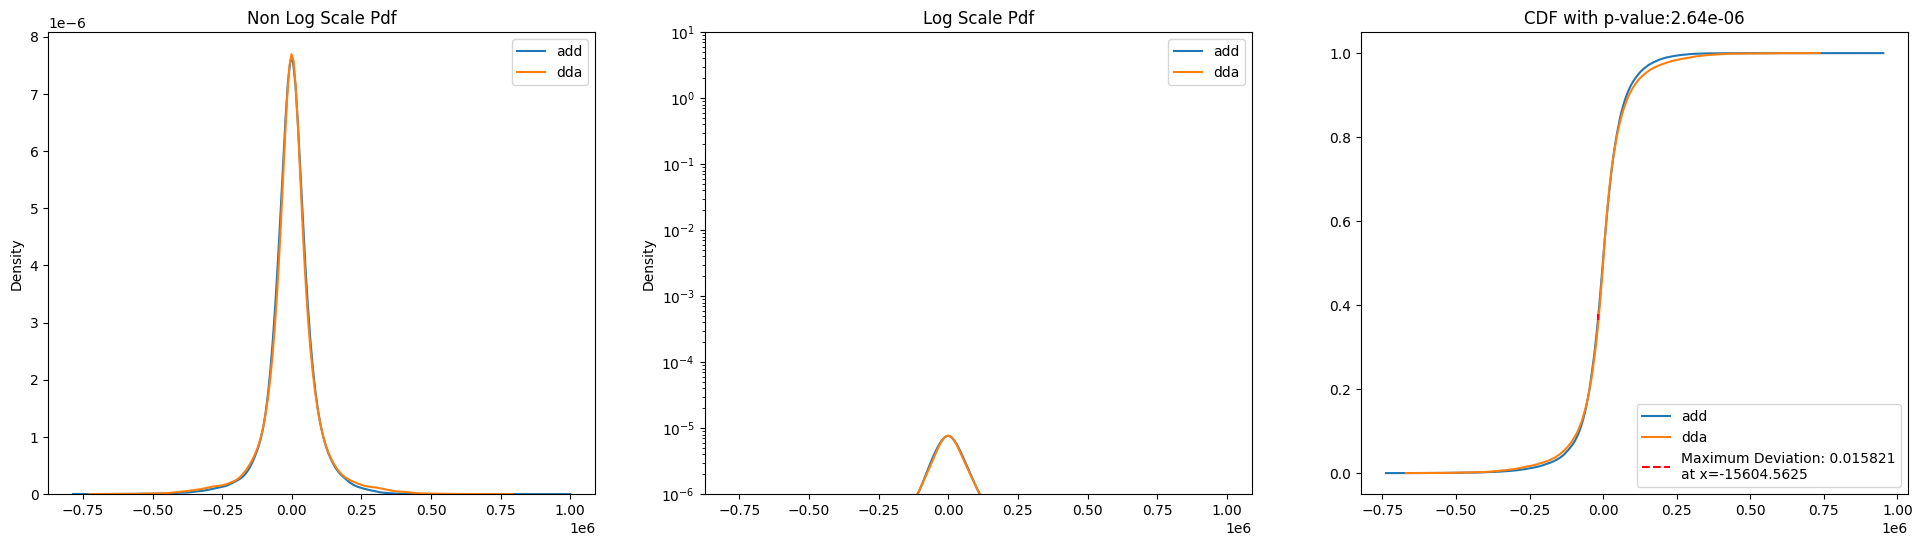

In [32]:
first_samp = layer_df[layer_df["orientation"] == "add"]["data"].iloc[0]
second_samp = layer_df[layer_df["orientation"] == "dda"]["data"].iloc[0]
twoSampleComparisonPlots(first_samp, second_samp, samp1name="add", samp2name= "dda")
""

''

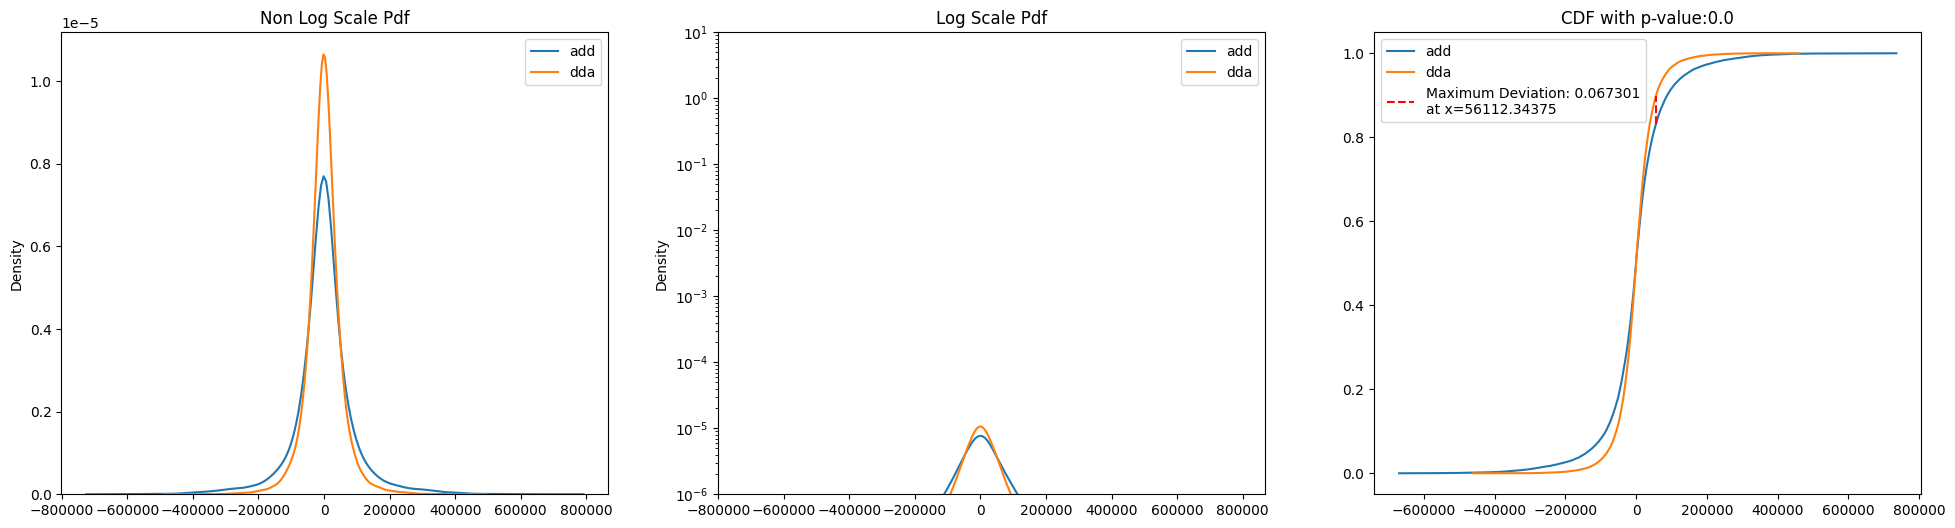

In [33]:
first_samp = layer_df[layer_df["orientation"] == "dda"]["data"].iloc[0]
second_samp = layer_df[layer_df["orientation"] == "ddd"]["data"].iloc[0]
twoSampleComparisonPlots(first_samp, second_samp, samp1name="add", samp2name= "dda")
""

# Layer 6

522767


,First,Second,KS_Stat,Pvalue
18,dad,dda,0.007768,3.961890e-14
12,add,dad,0.010992,7.383209e-28
13,add,dda,0.014926,5.149416e-51
0,aad,ada,0.035505,1.009506e-286
2,aad,daa,0.043365,0.000000e+00
7,ada,daa,0.052704,0.000000e+00
14,add,ddd,0.070517,0.000000e+00
20,dda,ddd,0.075412,0.000000e+00
19,dad,ddd,0.078754,0.000000e+00
9,ada,dda,0.110085,0.000000e+00


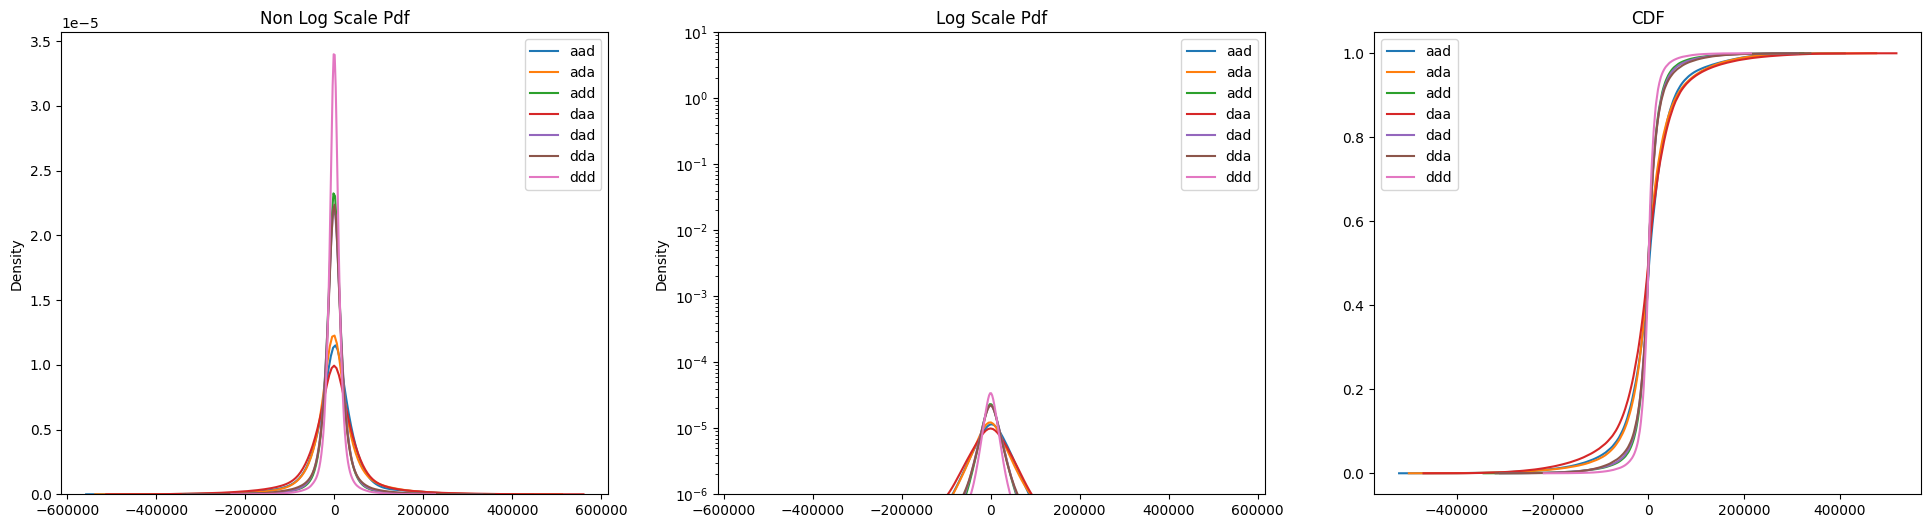

In [34]:
layer = 6
layer_df = wv[wv["layer"] == layer]
data = layer_df["data"].to_list()
names = layer_df["orientation"].to_list()
print(len(data[0]))
multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)
ks_df = ksCombinations(data, layer_df["orientation"].to_list()).sort_values(["KS_Stat"])
ks_df

''

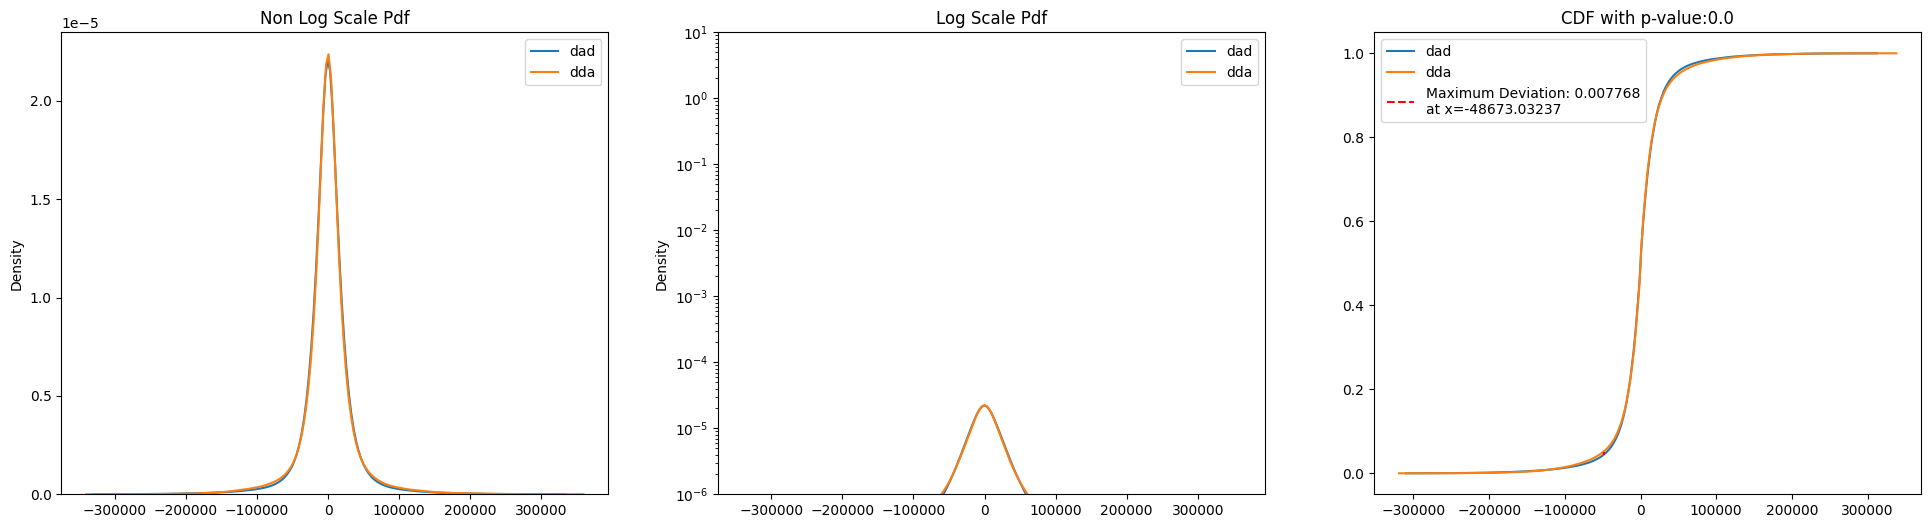

In [35]:
first_samp = layer_df[layer_df["orientation"] == "dad"]["data"].iloc[0]
second_samp = layer_df[layer_df["orientation"] == "dda"]["data"].iloc[0]
twoSampleComparisonPlots(first_samp, second_samp, samp1name="dad", samp2name= "dda")
""

# Layer 7

4584824


,First,Second,KS_Stat,Pvalue
18,dad,dda,0.007803,1.163456e-121
12,add,dad,0.010296,1.635662e-211
13,add,dda,0.014192,0.000000e+00
7,ada,daa,0.027037,0.000000e+00
2,aad,daa,0.048697,0.000000e+00
0,aad,ada,0.049353,0.000000e+00
20,dda,ddd,0.085042,0.000000e+00
19,dad,ddd,0.089502,0.000000e+00
14,add,ddd,0.090542,0.000000e+00
8,ada,dad,0.137282,0.000000e+00


/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


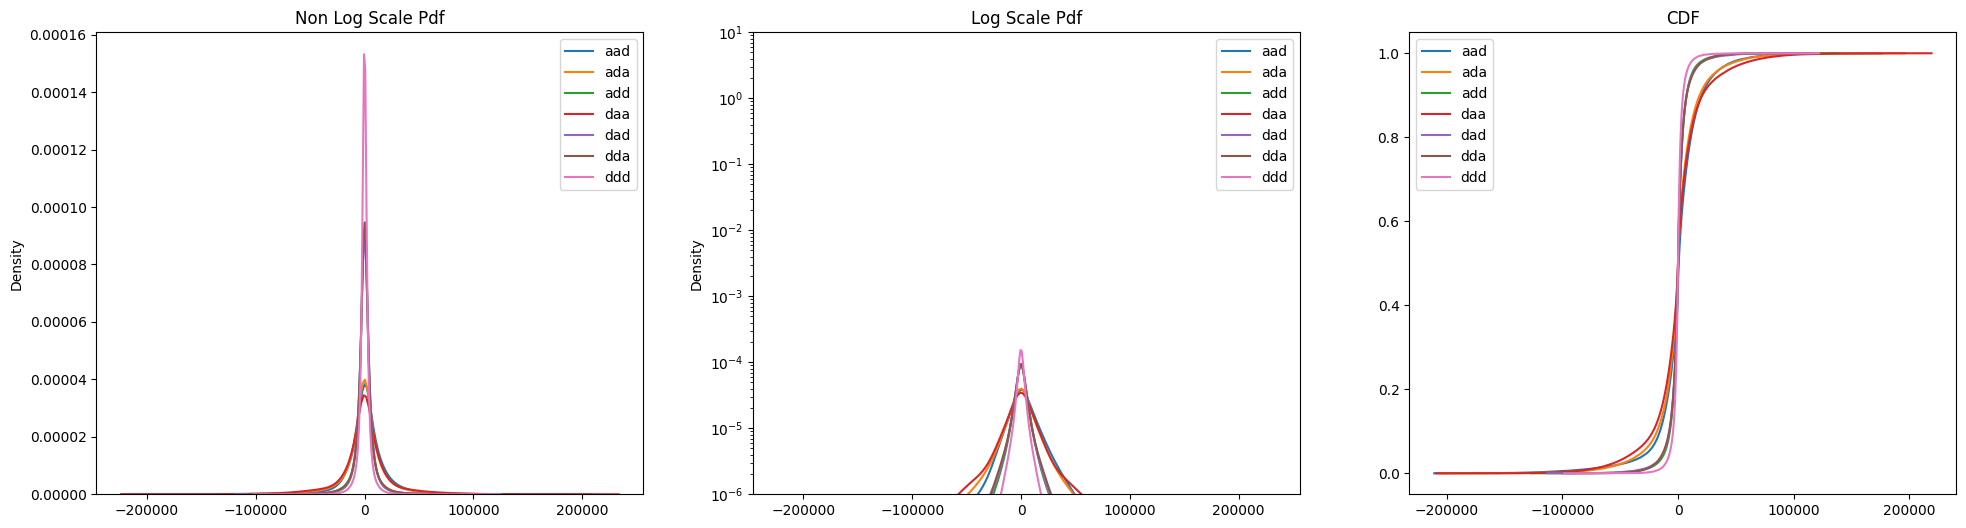

In [40]:
layer = 7
layer_df = wv[wv["layer"] == layer]
data = layer_df["data"].to_list()
names = layer_df["orientation"].to_list()
print(len(data[0]))
multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)
ks_df = ksCombinations(data, layer_df["orientation"].to_list()).sort_values(["KS_Stat"])
ks_df

''

/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


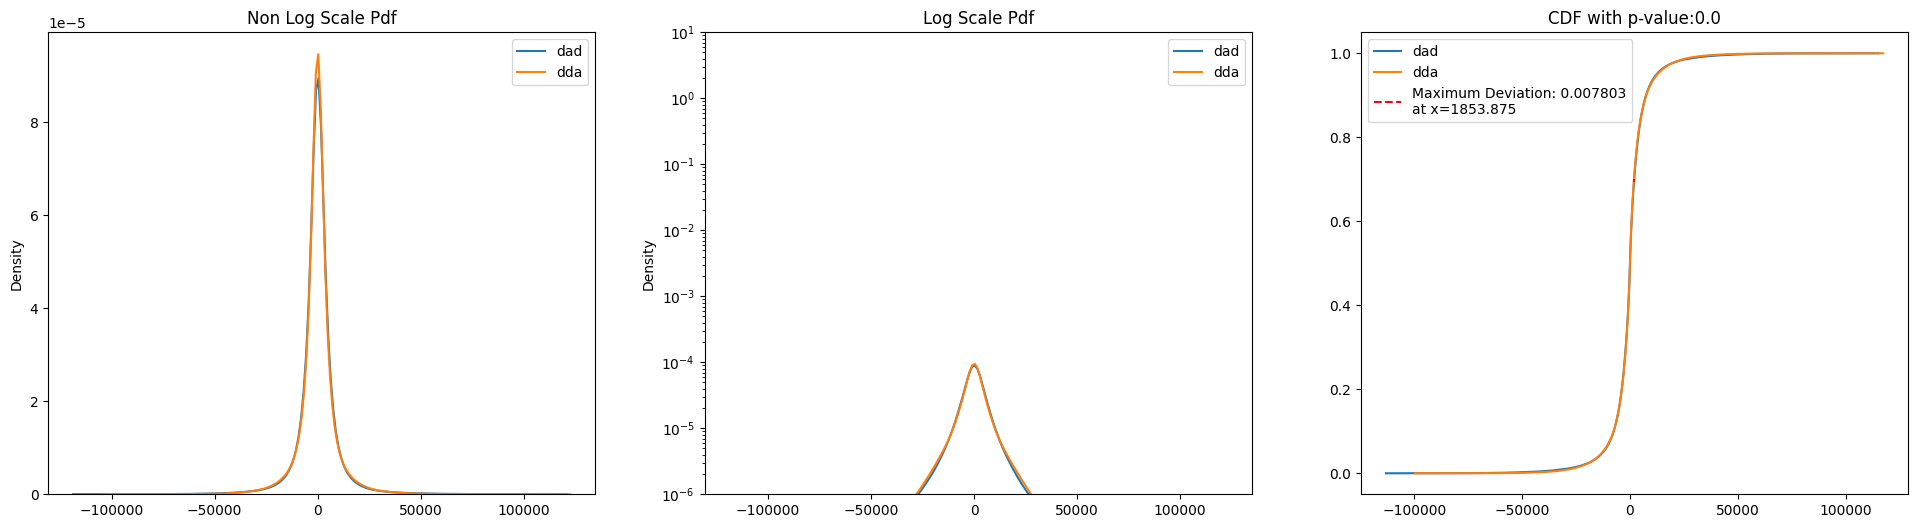

In [39]:
first_samp = layer_df[layer_df["orientation"] == "dad"]["data"].iloc[0]
second_samp = layer_df[layer_df["orientation"] == "dda"]["data"].iloc[0]
twoSampleComparisonPlots(first_samp, second_samp, samp1name="dad", samp2name= "dda")
""